In [53]:
import numpy as np

np.random.seed(5)
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size =100)
x2 = 0.5 * x1 + rng.normal(size =100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size =100)

$ Y=\beta_0+ \beta_1 X_1+\beta_2 X_2+ \epsilon =2+2X_1+0.3X_2+ \epsilon$

In [54]:
# Get correlations
np.corrcoef(x1,x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

The correlation coefficient between $X_1$ and $X_2$ is 0.772.

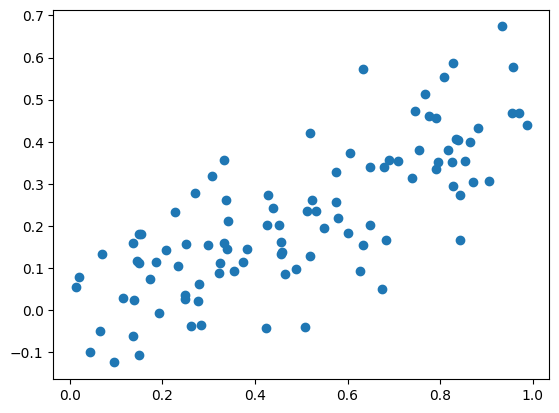

In [55]:
import matplotlib.pyplot as plt
# Draw scatterplot
plt.scatter(x1,x2);

In [56]:
import pandas as pd
import statsmodels.api as sm
# Define data
X = pd.DataFrame({'x1':x1, 'x2':x2})
X = sm.add_constant(X)  # No constant is added by the model unless we're using formulas, so we have to add it

# Create model
model = sm.OLS(y, X)

# Fit regression model
results = model.fit()

# Print results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           5.76e-08
Time:                        18:14:32   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$H_0: \beta_2=0$ . In this case the t-statistic is low and the p-value is high. Accordingly, the null hypothesis can't be rejected.

In [57]:
X = pd.DataFrame({'x1':x1})
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.37e-08
Time:                        18:14:32   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

The coefficient value increased to 2.0771 and the null hypothesis can be rejected and the alternative hypothesis accepted because p-value is zero. It can be said that this results are in line with our expectations from before.

In [58]:
X = pd.DataFrame({'x2':x2})
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           7.43e-07
Time:                        18:14:32   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

The coefficient value increased to 2.9103 and the null hypothesis can be rejected and the alternative hypothesis accepted because p-value is zero.

These results are significantly different from before beacause before the coefficient associated with $x_2$
had a lower value and the p-value suggested that the null hypothesis couldn't be rejected (coefficient value could be zero). Now, the coefficient value is higher (even higher than the coefficient value resulting from the case where only $x_1$ is used) and the null hypothesis can be rejected and the alternative hypothesis accepted.

The results do not contradict. What's happening here is a collinearity phenomenon. As suggested by the high correlation values and by the scatter plot (and, of course, from the generation of Y), we can linearly predict $x_1$ from $x_2$ (and vice-versa) with a substantial degree of accuracy. This is a clue of collinearity that is confirmed by the regression model. When both variables are combined in the same linear model, one of them loses explanatory power because the variance it explains is already being explained by the other variable. Accordingly, if considered individually, both variables lead to the rejection of the null hypothesis but, if considered together, one of the variables is dismissable.

Finally, the values of the coefficients agree with what we know from the underlying model. If one writes $x_2$ in terms of $x_1$, substitutes it in the model and adds both coefficients of $x_1$, we get 2.15. 

# Add a new observation

In [59]:
import statsmodels.formula.api as smf
# Define data
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})  # We don't need to add constant because we will use formulas

# Create model
mod = smf.ols(formula='y ~ x1 + x2', data=df)  # R-style command

# Fit model
res = mod.fit()

# Print results
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           5.76e-08
Time:                        18:14:32   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.0

In [61]:
# Add observation 
x1 = np.append(x1, 0.1)  # To x1
x2 = np.append(x2, 0.8)  # To x2
y = np.append(y, 6)  # To y
# New observation
new_data = {'x1': [0.1], 'x2': [0.8], 'y': [6]}
new_row = pd.DataFrame(new_data)

df = pd.concat([df, new_row], ignore_index=True)


In [62]:
X = pd.DataFrame({'x1':x1, 'x2':x2})
X = sm.add_constant(X)  # No constant is added by the model unless we're using formulas, so we have to add it

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           4.60e-08
Time:                        18:14:32   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.0

In [63]:
X = pd.DataFrame({'x1':x1})
X = sm.add_constant(X)  # No constant is added by the model unless we're using formulas, so we have to add it

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           9.23e-07
Time:                        18:14:32   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0739      0.201     10.310      0.0

In [64]:
X = pd.DataFrame({'x2':x2})
X = sm.add_constant(X)  # No constant is added by the model unless we're using formulas, so we have to add it

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           3.13e-08
Time:                        18:14:32   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2840      0.151     15.088      0.0

Effect on models: Model with $x_1$ and $x_2$. The value of the regression coefficients changed: x1 coefficient decreased and $x_2$ coefficient increased. As a consequence, $x_2$ became the coefficient with higher value. The null hypothesis is now rejected in both variables. 

Model with only $x_1$: not a lot pf change

Model with only $x_2$: not a lot of change


## Outliers and high leverage points analysis

### Outliers

An outlier is a point for which $y_i$ is far from the expected range predicted by the fit of the model. This raises the question of whether it is representative of the population.

Outliers can be identified from a univariate, bivariate, or multivariate perspective based on the number of variables (characteristics) considered. We should use as many perspectives as possible, looking for a consistent pattern across them to identify outliers.

Cases that fall markedly outside the range of other observations will be seen as isolated points in the scatterplot. A drawback of the bivariate method in general is the potentially large number of scatterplots that arise as the number of variables increases. For 3 variables, it is only 3 graphs for all pairwise comparisons. But for 5 variables, it takes 10 graphs, and for 10 variables it takes 45 scatterplots! Since this analysis doesn't involve more than 2 variables, we can perform all pairwise comparisons.

## High leverage points

We just saw that outliers are observations for which the response $y_i$ is unusual given the predictor $x_i$. In contrast, observations with high leverage have an unusual value for $x_i$.

In statistics, particularly in regression analysis, leverage is a measure of how far away the independent variable values of an observation are from those of the other observations.

In a simple linear regression, high leverage observations are fairly easy to identify, since we can simply look for observations for which the predictor value is outside of the normal range of the observations. With a single predictor, an extreme x value is simply one that is particularly high or low.

But in a multiple linear regression with many predictors, it is possible to have an observation that is well within the range of each individual predictor’s values, but that is unusual in terms of the full set of predictors. With multiple predictors, extreme x values may be particularly high or low for one or more predictors, or may be "unusual" combinations of predictor values (e.g., with two predictors that are positively correlated, an unusual combination of predictor values might be a high value of one predictor paired with a low value of the other predictor).

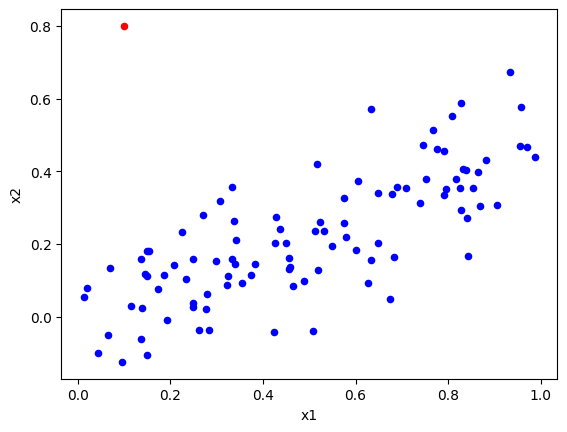

In [65]:
# Bivariate analysis (x1,x2)
sample = df.iloc[-1:]  # To get the last observation
other = df.iloc[:-1]  # To get all the observations but the last
ax = other.plot(kind='scatter',x='x1',y='x2', color='blue');  # Plot all observations but the last in blue
sample.plot(ax=ax, kind='scatter',x='x1',y='x2', color='red');  # Plot last observation added in red

There is an unusual combination of predictor values, so it looks like an high leverage point.

Note: we are not comparing predictors with responses nor evaluating if $y_i$
is far from the value predicted by the model. Therefore, it doesn't make sense to discuss if it's an outlier or not based on this plot.

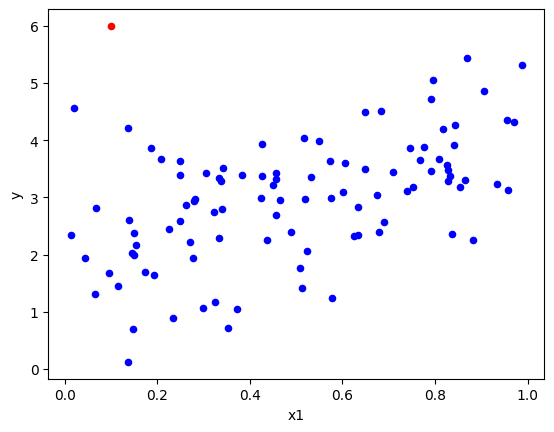

In [66]:
# Bivariate analysis (x1,y)
sample = df.iloc[-1:]  # To get the last observation
other = df.iloc[:-1]  # To get all the observations but the last
ax = other.plot(kind='scatter',x='x1',y='y', color='blue');  # Plot all observations but the last in blue
sample.plot(ax=ax, kind='scatter',x='x1',y='y', color='red');  # Plot last observation added in red

The red point does not follow the trend, so it looks like an outlier.
The red point doesn't have an unusual $x_1$
value, so it doesn't look like an high leverage point.

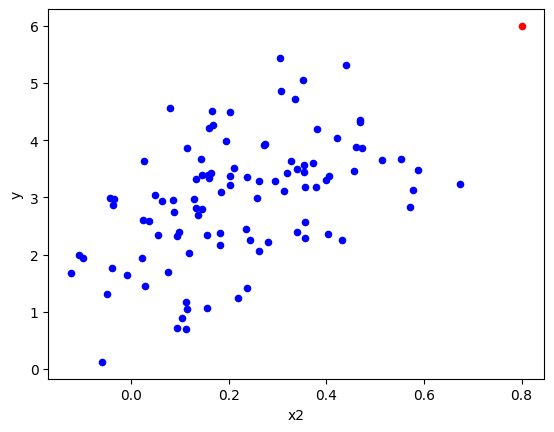

In [67]:
# Bivariate analysis (x2,y)
sample = df.iloc[-1:]  # To get the last observation
other = df.iloc[:-1]  # To get all the observations but the last
ax = other.plot(kind='scatter',x='x2',y='y', color='blue');  # Plot all observations but the last in blue
sample.plot(ax=ax, kind='scatter',x='x2',y='y', color='red');  # Plot last observation added in red


The red point follows the trend, so it doesn't look like an outlier.
The red point has an extreme $x_2$ value, so it looks like an high leverage point.

In summary: the observation added influences significantly the model, in particular if we consider the regression model that includes $x_1$
and $x_2$. In this case, $x_2$

passed from a neglected variable to a significant variable. This means that even being just 1 observation in 100, this observation reduced the existing phenomenon of collinearity. Also, the R-squared of the model reduced, which signifies a decrease in the model predicition capacity.

According to the scatter plots, the observation added seems to be both an outlier and and an high leverage point. This conclusion can be taken from the visual observation of the observation added when confronted with the remaining observations. The added observations shows an unusual combination of predictor values, extreme predictor values and a substantial different behaviour when compared with other observations in several cases.